In [66]:
from getMusicData import *
import pandas as pd
from pymongo import MongoClient
import collections
import json
import sys

artists = ['KRS-One','Rakim','Chuck D','Ice-T','Logic','Run-D.M.C.', 'Slick Rick',
           'Big Daddy Kane','LL Cool J','The Notorious B.I.G.','DMX','Big L','Nas','Lauryn Hill',
           'Ice Cube','2Pac','Redman','Big Boi','Kanye West','Jay-Z','Outkast','J Cole','Rick Ross',
           'Common','Ghostface Killah','Eminem','Lupe Fiasco','MF DOOM','Ludacris','Kendrick Lamar',
           'Killer Mike','Vince Staples','Freddie Gibbs', 'Lil Uzi Vert', 'Drake','Desiigner', 
           'Travis Scott', 'Earl Sweatshirt','Danny Brown', 'Chance The Rapper', 'Schoolboy Q',
           'Snoop Dogg', 'Mos Def', 'Vic Mensa', 'Eazy-E', 'Future', 'Lil Wayne', 'Wu Tang Clan',
           'Dr. Dre', 'Busta Rhymes', '50 Cent', 'Wiz Khalifa', 'A$AP Rocky', 'A$AP Ferg', 
           'Nicki Minaj','Lil Kim', 'Missy Elliot', 'Remy Ma', 'Young Thug', 'Marley Marl', 'A Tribe Called Quest',
           'De La Soul', 'Public Enemy', 'MC Hammer', 'Scarface','Coolio', 'Method Man',
           'Puff Daddy', 'Afrika Bambaataa', 'Grandmaster Flash', 'Sugarhill Gang']

client = MongoClient()
music_db = client.music_db
songs = music_db.song_collection

verifyArtists(artists)

DONE 
71 Artists


In [65]:
#%time getAllSongs(['Sugarhill Gang'])

In [44]:
music_df = pd.DataFrame(list(songs.find()))

In [45]:
music_df.head()

,_id,acousticness,album,analysis_url,artist,danceability,duration_ms,energy,id,instrumentalness,...,mode,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence,year
0,598ba6d30765e02e52d43a68,0.034600,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/5IR1...,KRS-One,0.668,171293.0,0.573,5IR1BV84fjB5SPzDw5NTQp,0.000578,...,0.0,0.363,182.223,4.0,https://api.spotify.com/v1/tracks/5IR1BV84fjB5...,KRS-One Attacks,audio_features,spotify:track:5IR1BV84fjB5SPzDw5NTQp,0.711,1993
1,598ba6d40765e02e52d43a69,0.000298,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/1yjR...,KRS-One,0.849,268907.0,0.757,1yjRkRZ9N9blrca0f0UzeF,0.110000,...,1.0,0.184,96.374,4.0,https://api.spotify.com/v1/tracks/1yjRkRZ9N9bl...,Outta Here,audio_features,spotify:track:1yjRkRZ9N9blrca0f0UzeF,0.467,1993
2,598ba6d40765e02e52d43a6a,0.022900,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/0i5B...,KRS-One,0.936,179160.0,0.575,0i5BepbSYym7AAIqyOhIxL,0.003320,...,0.0,0.242,95.481,4.0,https://api.spotify.com/v1/tracks/0i5BepbSYym7...,Black Cop,audio_features,spotify:track:0i5BepbSYym7AAIqyOhIxL,0.698,1993
3,598ba6d50765e02e52d43a6b,0.038000,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/7sBx...,KRS-One,0.914,200000.0,0.615,7sBxvRUzQmF7uB2ZFfjzF3,0.000164,...,0.0,0.284,96.277,4.0,https://api.spotify.com/v1/tracks/7sBxvRUzQmF7...,Mortal Thought,audio_features,spotify:track:7sBxvRUzQmF7uB2ZFfjzF3,0.822,1993
4,598ba6d50765e02e52d43a6c,0.018000,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/0dup...,KRS-One,0.909,214173.0,0.962,0dupEkAq7v5mTay6lJBvRx,0.000000,...,1.0,0.290,100.694,4.0,https://api.spotify.com/v1/tracks/0dupEkAq7v5m...,I Can't Wake Up,audio_features,spotify:track:0dupEkAq7v5mTay6lJBvRx,0.617,1993


In [46]:
music_df.columns

Index(['_id', 'acousticness', 'album', 'analysis_url', 'artist',
       'danceability', 'duration_ms', 'energy', 'id', 'instrumentalness',
       'key', 'liveness', 'loudness', 'lyrics', 'mode', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'track_name', 'type', 'uri', 'valence',
       'year'],
      dtype='object')

In [47]:
#songs.delete_many({"artist": "KRS-One"})

In [48]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 24 columns):
_id                 8100 non-null object
acousticness        4342 non-null float64
album               8100 non-null object
analysis_url        4342 non-null object
artist              8100 non-null object
danceability        4335 non-null float64
duration_ms         4342 non-null float64
energy              4342 non-null float64
id                  4342 non-null object
instrumentalness    4342 non-null float64
key                 4342 non-null float64
liveness            4340 non-null float64
loudness            4342 non-null float64
lyrics              8100 non-null object
mode                4342 non-null float64
speechiness         4335 non-null float64
tempo               4342 non-null float64
time_signature      4335 non-null float64
track_href          4342 non-null object
track_name          8100 non-null object
type                4342 non-null object
uri                 

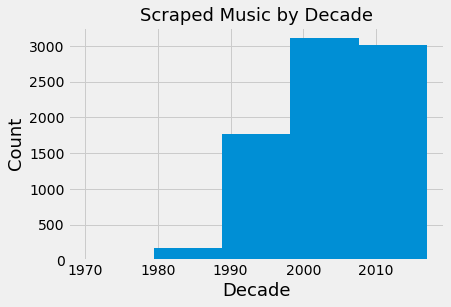

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
music_df['year'].hist(bins=5)
plt.title('Scraped Music by Decade', fontsize=18)
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Count', fontsize=18)

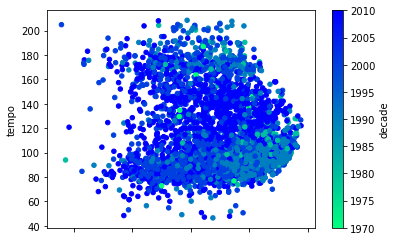

In [50]:
music_df['decade'] = [int(str(x)[:3]+'0') for x in music_df['year']]
music_df.plot('danceability', 'tempo', kind='scatter', c='decade', cmap='winter_r')
plt.xlabel('danceability')
plt.show()

In [75]:
list(music_df[music_df['decade']==2010]['artist'].unique())

['Ice Cube',
 'Logic',
 'LL Cool J',
 'DMX',
 'Nas',
 'Redman',
 'Big Boi',
 'Kanye West',
 'Jay-Z',
 'Common',
 'Ghostface Killah',
 'Eminem',
 'Lupe Fiasco',
 'Ludacris',
 'Kendrick Lamar',
 'Killer Mike',
 'Vince Staples',
 'Freddie Gibbs',
 'Lil Uzi Vert',
 'Drake',
 'Desiigner',
 'Travis Scott',
 'Earl Sweatshirt',
 'Danny Brown',
 'Chance The Rapper',
 'Schoolboy Q',
 'J Cole',
 'Rick Ross',
 'Snoop Dogg',
 'Vic Mensa',
 'Future',
 'Lil Wayne',
 'Wu Tang Clan',
 'Dr. Dre',
 'Busta Rhymes',
 '50 Cent',
 'Wiz Khalifa',
 'A$AP Rocky',
 'A$AP Ferg',
 'Nicki Minaj',
 'Young Thug',
 'A Tribe Called Quest',
 'De La Soul',
 'Public Enemy']

Songs included:
The Genesis
N.Y. State Of Mind
Life's A Bitch
The World Is Yours
Halftime
Memory Lane (Sittin' In Da Park)
One Love
One Time 4 Your Mind
Represent
It Ain't Hard To Tell
Life's A Bitch
The World Is Yours (Remix)
One Love
It Ain't Hard To Tell (Remix)
On The Real
Star Wars
Album Intro
The Message
Street Dreams
I Gave You Power
Watch Dem Niggas
Take It In Blood
Nas Is Coming
Affirmative Action
The Set Up
Black Girl Lost
Suspect
Shootouts
Live Nigga Rap
If I Ruled The World (Imagine That)
Silent Murder
Album Intro 3
N.Y. State Of Mind Pt. II
Hate Me Now
Small World
Favor For A Favor
We Will Survive
Ghetto Prisoners
You Won't See Me Tonight
I Want To Talk To You
Dr. Knockboot
Life Is What You Make It
Big Things
Nas Is Like
K-I-SS-I-N-G
Money Is My Bitch
Undying Love
Nature Shines
Pray
The Prediction
Life We Chose
Nastradamus
Some Of Us Have Angels
Project Windows
Come Get Me
Shoot 'Em Up
Last Words
Family
God Love Us
Quiet Niggas
Big Girl
New World
You Owe Me
The Outcome
Sti

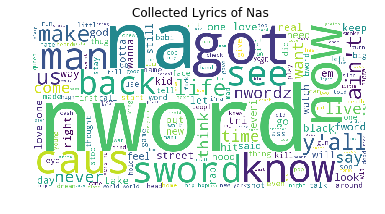

In [51]:
from wordcloud import WordCloud, STOPWORDS
from process_lyrics import *

music_df['processed_lyrics'] = [preprocess_all(lyric) for lyric in music_df['lyrics']]

def buildcloud(text,title,stopwords=STOPWORDS):
    wordcloud = WordCloud(background_color="white", stopwords=STOPWORDS, width=800, height=400)
    #text = preprocess_all(text)
    wordfreq = wordcloud.process_text(text)
    viz = wordcloud.generate_from_frequencies(wordfreq)
    plt.imshow(wordcloud)
    plt.axis("off")    
    plt.title(title)
    plt.show()
    return wordfreq

def artistcloud(artist):
    dfa = music_df[music_df['artist']==artist]
    text=""
    print("Songs included:")
    for lyric in dfa['processed_lyrics']:
        print(dfa[dfa['processed_lyrics']==lyric]['track_name'].unique()[0])
        text += lyric
    buildcloud(text,"Collected Lyrics of "+artist)

artist = 'Nas'
# for lyric in music_df['lyrics'][music_df['artist']==artist]:
#     text += lyric
    
all_freq = artistcloud(artist)

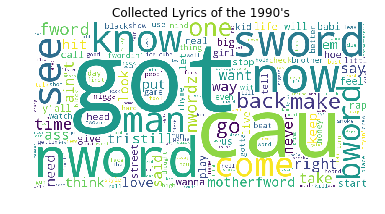

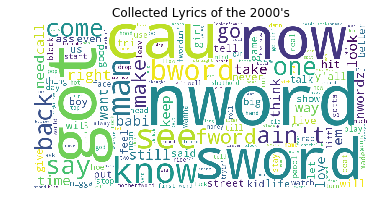

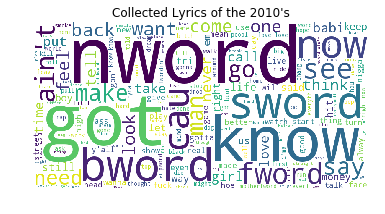

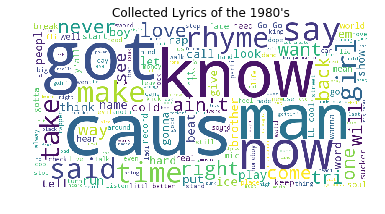

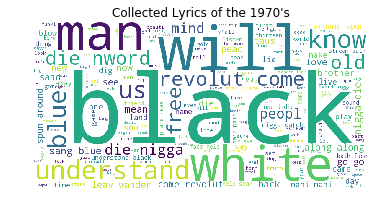

In [52]:
def decadecloud(decade):
    dfdecade = music_df[music_df['decade']==decade]
    text=""
    for lyric in dfdecade['processed_lyrics']:
        text += lyric
    buildcloud(text,"Collected Lyrics of the "+str(decade)+"'s")

for decade in music_df['decade'].unique():
    dec_freq = decadecloud(decade)

### Vocab Complexity

In [53]:
import numpy as np
import nltk

# make an array containing vocabulary comlpexity of each song
wordset=[]
wordcount=[]

for lyric in music_df['processed_lyrics']:
    d=len(nltk.word_tokenize(lyric))
    n=len(set(nltk.word_tokenize(lyric)))
    wordset.append(1.0*n)
    wordcount.append(1.0*d)  
    
music_df['wordcount'] = wordcount
music_df['wordset'] = wordset
vocab_complex = np.array(wordset)/np.array(wordcount)
music_df['Vocab Complexity'] = vocab_complex
music_df['Repetition Score']= 1/vocab_complex
print(len(vocab_complex), len(music_df))

8100 8100


In [54]:
music_df.head(3)

,_id,acousticness,album,analysis_url,artist,danceability,duration_ms,energy,id,instrumentalness,...,type,uri,valence,year,decade,processed_lyrics,wordcount,wordset,Vocab Complexity,Repetition Score
0,598ba6d30765e02e52d43a68,0.034600,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/5IR1...,KRS-One,0.668,171293.0,0.573,5IR1BV84fjB5SPzDw5NTQp,0.000578,...,audio_features,spotify:track:5IR1BV84fjB5SPzDw5NTQp,0.711,1993,1990,spoken intro will forev understand forev fore...,32.0,23.0,0.718750,1.391304
1,598ba6d40765e02e52d43a69,0.000298,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/1yjR...,KRS-One,0.849,268907.0,0.757,1yjRkRZ9N9blrca0f0UzeF,0.110000,...,audio_features,spotify:track:1yjRkRZ9N9blrca0f0UzeF,0.467,1993,1990,* DJ premier samplesscratch vers boogi perform...,400.0,249.0,0.622500,1.606426
2,598ba6d40765e02e52d43a6a,0.022900,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/0i5B...,KRS-One,0.936,179160.0,0.575,0i5BepbSYym7AAIqyOhIxL,0.003320,...,audio_features,spotify:track:0i5BepbSYym7AAIqyOhIxL,0.698,1993,1990,buck buck buck-buck-buck buck-buck buck buck r...,287.0,109.0,0.379791,2.633028


In [55]:
def vocabplot(stat, title, ylab):
    years=music_df.groupby('decade')
    year_vocab_div = dict()
    
    for year in years:
        year_vocab_div[year[0]]= year[1][stat].mean()

    plotdict = collections.OrderedDict(sorted(year_vocab_div.items())) 
    #plt.ylim([0,1])
    plt.title(title, fontsize=18)
    plt.ylabel(ylab, fontsize=18)
    plt.xlabel("Year (Decade)", fontsize=18)
    x=list(plotdict.keys())
    y=list(plotdict.values())
    #print(y)
    plt.plot(x,y, label = 'By Decade')

    years=music_df.groupby('year')
    year_vocab_div= dict()
    
    for year in years:
        year_vocab_div[year[0]]= year[1][stat].mean()
        
    plotdict = collections.OrderedDict(sorted(year_vocab_div.items())) 
    x=list(plotdict.keys())
    y=list(plotdict.values())
    plt.plot(x,y, label = 'By Year')
    plt.legend()

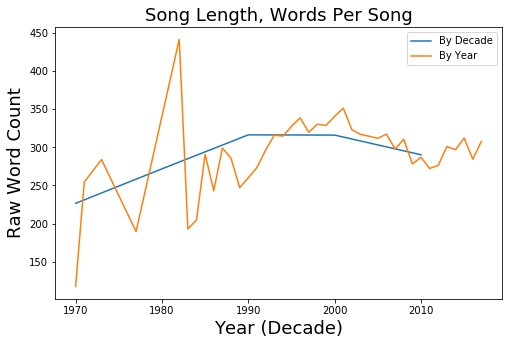

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
vocabplot('wordcount',"Song Length, Words Per Song","Raw Word Count")

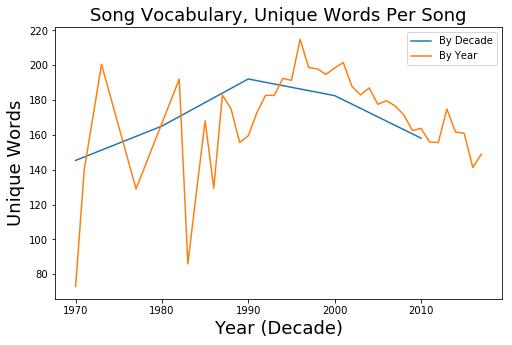

In [57]:
vocabplot("wordset","Song Vocabulary, Unique Words Per Song","Unique Words")

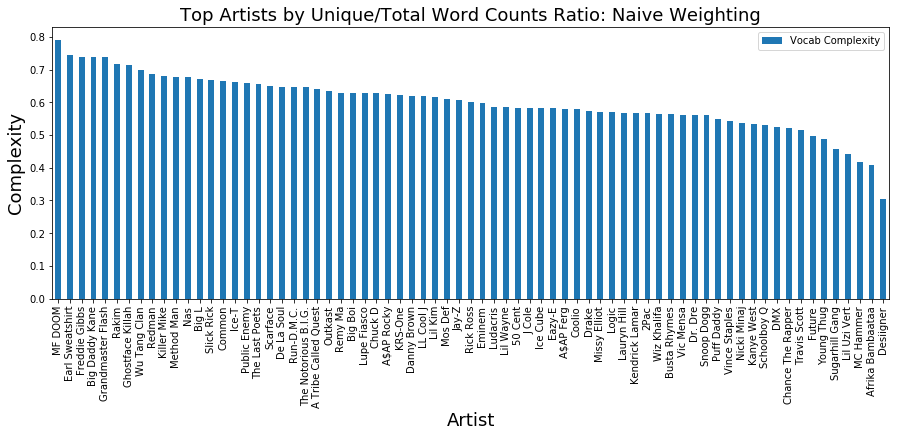

In [58]:
rcParams['figure.figsize'] = 15, 5

artist_complexity = music_df[['artist', 'Vocab Complexity']].groupby('artist').mean()
artist_complexity = artist_complexity.sort_values('Vocab Complexity', ascending=False)
t = 'Top Artists by Unique/Total Word Counts Ratio: Naive Weighting'
artist_complexity.plot(kind='bar')
plt.title(t, fontsize=18)
plt.xlabel('Artist', fontsize=18)
plt.ylabel('Complexity', fontsize=18)

In [59]:
music_df['Weighted Complexity'] = (music_df['wordset'] / music_df['wordcount']) * music_df['wordset']
music_df.head(3)

,_id,acousticness,album,analysis_url,artist,danceability,duration_ms,energy,id,instrumentalness,...,uri,valence,year,decade,processed_lyrics,wordcount,wordset,Vocab Complexity,Repetition Score,Weighted Complexity
0,598ba6d30765e02e52d43a68,0.034600,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/5IR1...,KRS-One,0.668,171293.0,0.573,5IR1BV84fjB5SPzDw5NTQp,0.000578,...,spotify:track:5IR1BV84fjB5SPzDw5NTQp,0.711,1993,1990,spoken intro will forev understand forev fore...,32.0,23.0,0.718750,1.391304,16.531250
1,598ba6d40765e02e52d43a69,0.000298,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/1yjR...,KRS-One,0.849,268907.0,0.757,1yjRkRZ9N9blrca0f0UzeF,0.110000,...,spotify:track:1yjRkRZ9N9blrca0f0UzeF,0.467,1993,1990,* DJ premier samplesscratch vers boogi perform...,400.0,249.0,0.622500,1.606426,155.002500
2,598ba6d40765e02e52d43a6a,0.022900,Return of the Boom Bap,https://api.spotify.com/v1/audio-analysis/0i5B...,KRS-One,0.936,179160.0,0.575,0i5BepbSYym7AAIqyOhIxL,0.003320,...,spotify:track:0i5BepbSYym7AAIqyOhIxL,0.698,1993,1990,buck buck buck-buck-buck buck-buck buck buck r...,287.0,109.0,0.379791,2.633028,41.397213


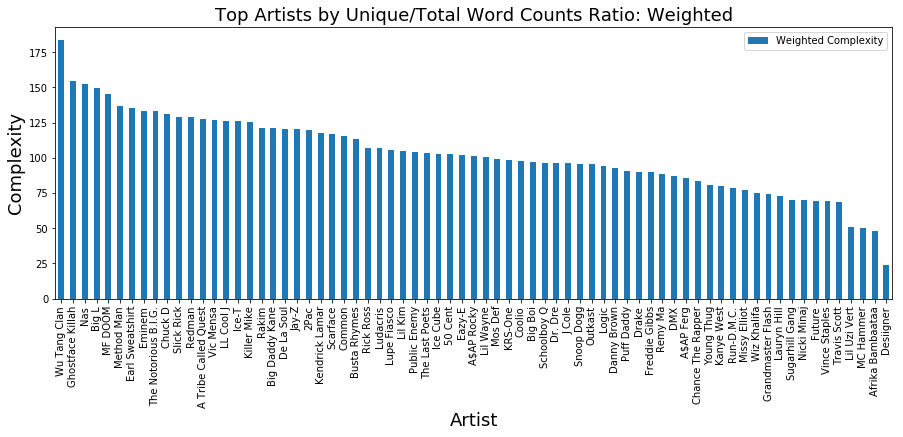

In [60]:
rcParams['figure.figsize'] = 15, 5

artist_complexity = music_df[['artist', 'Weighted Complexity']].groupby('artist').mean()
artist_complexity = artist_complexity.sort_values('Weighted Complexity', ascending=False)
t = 'Top Artists by Unique/Total Word Counts Ratio: Weighted'
artist_complexity.plot(kind='bar')
plt.title(t, fontsize=18)
plt.xlabel('Artist', fontsize=18)
plt.ylabel('Complexity', fontsize=18)

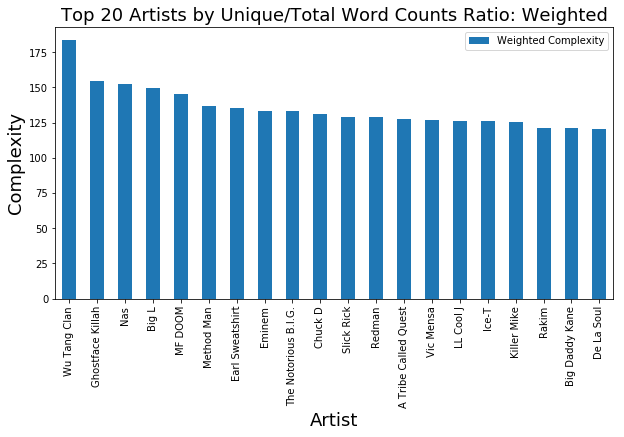

In [61]:
rcParams['figure.figsize'] = 10, 5
t = 'Top 20 Artists by Unique/Total Word Counts Ratio: Weighted'
artist_complexity[:20].plot(kind='bar')
plt.title(t, fontsize=18)
plt.xlabel('Artist', fontsize=18)
plt.ylabel('Complexity', fontsize=18)

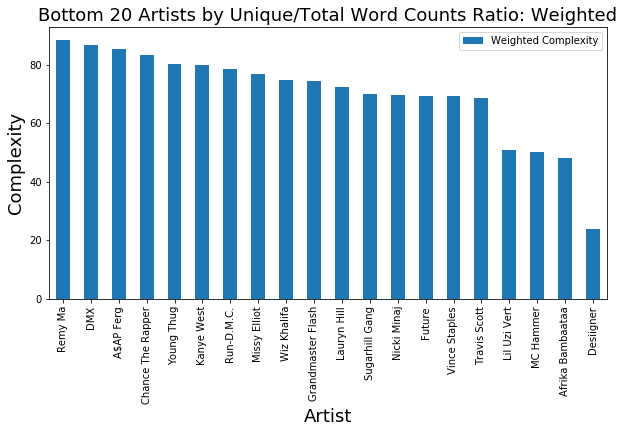

In [62]:
rcParams['figure.figsize'] = 10, 5
t = 'Bottom 20 Artists by Unique/Total Word Counts Ratio: Weighted'
artist_complexity[-20:].plot(kind='bar')
plt.title(t, fontsize=18)
plt.xlabel('Artist', fontsize=18)
plt.ylabel('Complexity', fontsize=18)

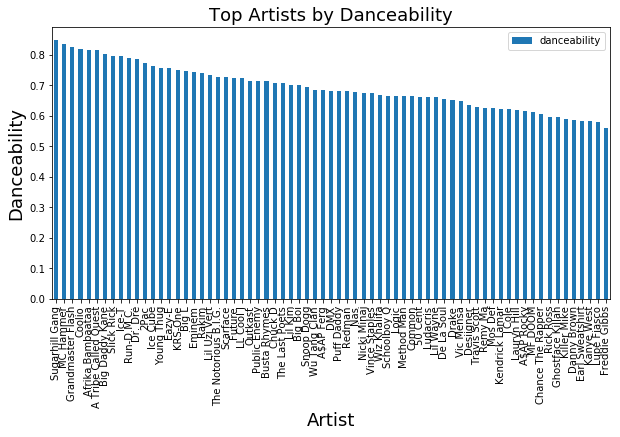

In [63]:
danceability = music_df[['artist', 'danceability']].groupby('artist').mean().dropna()
danceability = danceability.sort_values('danceability', ascending=False)
t = 'Top Artists by Danceability'
danceability.plot(kind='bar')
plt.title(t, fontsize=18)
plt.xlabel('Artist', fontsize=18)
plt.ylabel('Danceability', fontsize=18)

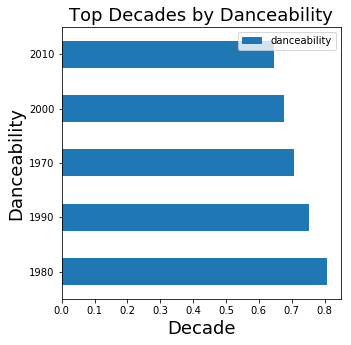

In [64]:
rcParams['figure.figsize'] = 5, 5
decade_dance = music_df[['decade', 'danceability']].groupby('decade').mean()
decade_dance = decade_dance.sort_values('danceability', ascending=False)
t = 'Top Decades by Danceability'
decade_dance.plot(kind='barh')
plt.title(t,fontsize=18)
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Danceability', fontsize=18)